In [25]:
from tnia.plotting.projections import show_xyz_max, show_xy_zy_max, show_xy_zy_slice_center
from clij2fft.richardson_lucy import richardson_lucy, richardson_lucy_nc
from skimage.io import imread
import numpy as np

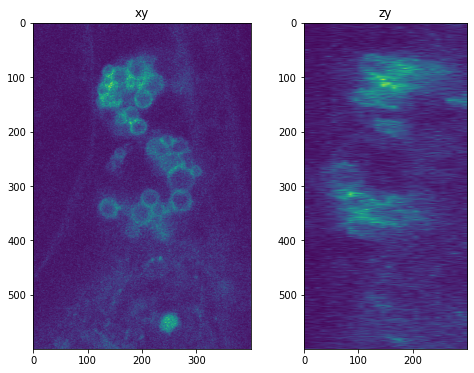

In [26]:
base_dir ="/home/bnorthan/Images/tnia-python-images/"
base_dir =r"D:\images\tnia-python-images/"

dir_name=base_dir+"deconvolution/list-serv-2022-11-9/"

input_name=dir_name+"Raw_Image_GFP.tif"

temp = imread(input_name)

x1=300
x2=700
y1=300
y2=900

ind = np.s_[:, y1:y2, x1:x2]
im = temp[ind]

fig = show_xy_zy_slice_center(im, sz=10, figsize=(8,6))

In [36]:
help(gibson_lanni_3D)

Help on function gibson_lanni_3D in module tnia.deconvolution.psfs:

gibson_lanni_3D(NA, ni, ns, voxel_size_xy, voxel_size_z, xy_size, z_size, pz, wvl, confocal=False)
    [summary]
    Generates and returns a Gibson Lanni PSF using the sdeconv library
    
    The function checks the version of sdeconv installed and uses the older implementation
    PSFGibsonLanni if major version is '0', or newer (PyTorch based) version if major version is '1'.



In [53]:
from tnia.deconvolution.psfs import gibson_lanni_3D
psf  = gibson_lanni_3D(1.4, 1.5, 1.5, .051, .425, 128, 64, 0, 0.5, True)

sdeconv 1.x.x detected


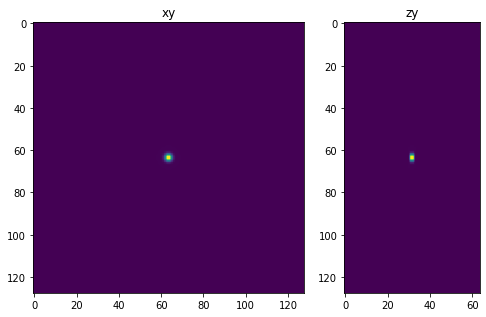

In [54]:
fig = show_xy_zy_max(psf, figsize=(8,6))

In [61]:
decon=richardson_lucy_nc(im, psf, 200, 0.005)

get lib


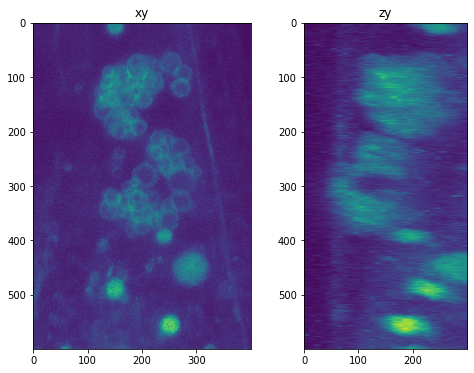

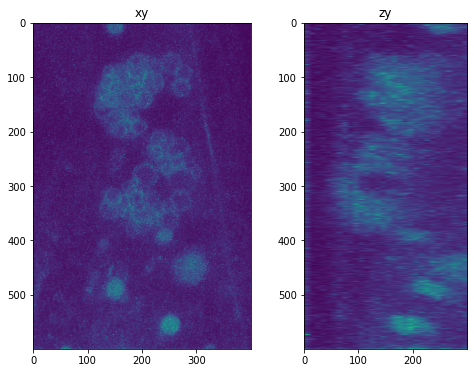

In [63]:
fig = show_xy_zy_max(im, sz=10, figsize=(8,6))
fig = show_xy_zy_max(decon, sz=10, figsize=(8,6))

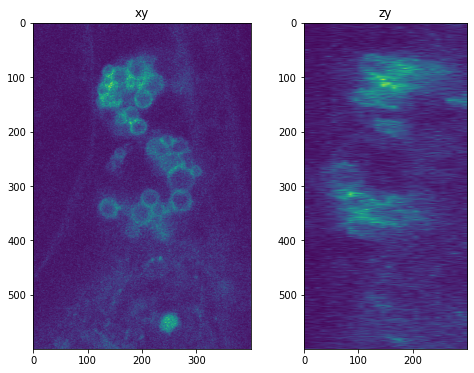

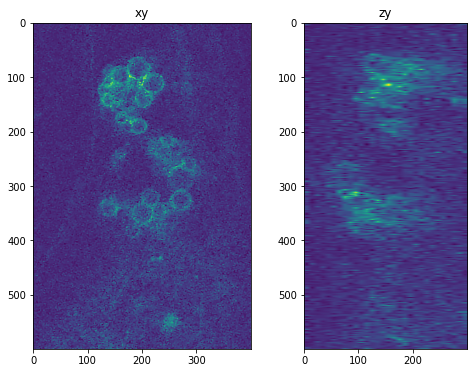

In [62]:
fig = show_xy_zy_slice_center(im, sz=10, figsize=(8,6))
fig = show_xy_zy_slice_center(decon, sz=10, figsize=(8,6))

In [60]:
import napari

viewer=napari.Viewer()
viewer.add_image(im)
viewer.add_image(decon)

C:\Users\bnort\miniconda3\envs\decon-napari\lib\site-packages\napari_tools_menu\__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)
ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "C:\Users\bnort\miniconda3\envs\decon-napari\lib\site-packages\zmq\eventloop\zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\bnort\miniconda3\envs\decon-napari\lib\site-packages\jupyter_client\threaded.py", line 122, in _handle_recv
    msg_list = self.ioloop._asyncio_event_loop.run_until_complete(get_msg(future_msg))
  File "C:\Users\bnort\miniconda3\envs\decon-napari\lib\asyncio\base_events.py", line 623, in ru

<Image layer 'decon' at 0x21383445430>